theta_0 = 1.89e-03 °; u(theta_0) = 1.14e-01 °


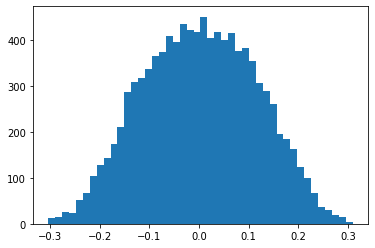

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd # bibliothèque pour créer des nombres aléatoires
N_sim = 10000 # nombre de simulations à faire

#Ecrire vos valeurs ci-dessous
phi0 = 75 #mette le résultat en degrés
phi1 = 100 #mettre le résultat en degrés
phim1 =  50 #mettre le résultat en degrés

#phi0_MC = np.zeros(N_sim) # un vecteur de taille N_sim qui contient des zéros
#phi1_MC = np.zeros(N_sim) # un vecteur de taille N_sim qui contient des zéros
#phim1_MC = np.zeros(N_sim) # un vecteur de taille N_sim qui contient des zéros
theta0_MC = np.zeros(N_sim) # un vecteur de taille N_sim qui contient des zéros

for i in range(N_sim):
    phi0_MC = phi0 + rd.uniform(-1, 1)/60 # simulation de distance objet-lentille
    phi1_MC = phi1 + rd.uniform(-1, 1)/60 # simulation de distance lentille-écran 
    phim1_MC = phim1 + rd.uniform(-1, 1)/60 # simulation de distance lentille-écran 
    theta0_MC[i] = np.degrees(np.arctan((np.sin(np.radians(phi1_MC-phi0_MC))+np.sin(np.radians(phim1_MC-phi0_MC))) / (2 - np.cos(np.radians(phi1_MC-phi0_MC))-np.cos(np.radians(phim1_MC-phi0_MC)))))
    
num, bins, patches = plt.hist(theta0_MC, bins='rice') # trace l’histogramme
print("theta_0 = {:.2e} °; u(theta_0) = {:.2e} °".format(np.mean(theta0_MC), np.std(theta0_MC, ddof=1)))
plt.show()

### Mesure d'une longueur d'onde

Mesure de $\lambda$ à partir d'une mesure d'angle $\varphi_1$, de la mesure de $\theta_0$ et de la formule du réseau.  

lambda = 2.19e+02 nm; u(lambda) = 2.25e+01 nm


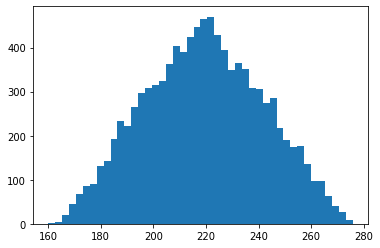

In [16]:
a = 1e6/600 #réseau de 600 traits par mm
long_onde = np.zeros(N_sim) # un vecteur de taille N_sim qui contient des zéros
for i in range(N_sim):
    phi0_MC = phi0 + rd.uniform(-1, 1)/60 # simulation de distance objet-lentille
    phi1_MC = phi1 + rd.uniform(-1, 1)/60 # simulation de distance lentille-écran 
    phim1_MC = phim1 + rd.uniform(-1, 1)/60 # simulation de distance lentille-écran 
    long_onde[i] = -(np.sin(phi1_MC-phi0_MC+theta0_MC[i])-np.sin(theta0_MC[i]))*a 

num, bins, patches = plt.hist(long_onde, bins='rice') # trace l’histogramme
print("lambda = {:.2e} nm; u(lambda) = {:.2e} nm".format(np.mean(long_onde), np.std(long_onde, ddof=1)))
plt.show()